In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests
import json

import config
from config import api_key
# Import API key

# Output File (CSV)
output_data_file = "output_data/house_prices.csv"

In [8]:
from pprint import pprint

In [46]:
# The URL for the FRED API
base = 'https://api.stlouisfed.org/fred/series/observations?series_id='

# List of FRED series IDs and their description
s_dict = {'ATNHPIUS26420Q': 'House Price Index for Houston',
          'POILWTIUSDM': 'Global price of WTI Crude',
          'MORTGAGE30US': '30 Year Fixed Mortgage Rate',
          'TXHARR1POP': 'Harris County Population',
          'TXHARR1URN': 'Harris County Unemployment',
          'CPIAUCSL': 'Consumer Price Index (1985=100)',
          'MHITX48201A052NCEN': 'Median Household Income Harris County',
          'SMU48264202000000001SA': 'Construction in Houston'
          }

#'POILWTIUSDM': 'Global price of WTI Crude'

# Include start date, API key from config.py file and file type json
start_date = '2000-01-02'
s_dates = '&observation_start={}'.format(start_date)
end_date = '2017-01-02'
e_dates = '&observation_end={}'.format(end_date)

api_key = '&api_key={}'.format(api_key)

ftype = '&file_type=json'
frequency = 'a'
freq = '&frequency={}'.format(frequency)
#aggregation = 'eop'
#agg = '&aggregation_method={}'.format(aggregation)

In [47]:
df = pd.DataFrame()
for code, name in s_dict.items():
    url = '{}{}{}{}{}{}{}'.format(base, code, s_dates,e_dates, api_key, ftype,freq)
    r = requests.get(url).json()['observations']
    df[name] = [i['value'] for i in r]
df.index = pd.to_datetime([i['date'] for i in r])
df.head(18)
#df.describe
#r

,House Price Index for Houston,Global price of WTI Crude,30 Year Fixed Mortgage Rate,Harris County Population,Harris County Unemployment,Consumer Price Index (1985=100),Median Household Income Harris County,Construction in Houston
2000-01-01,129.89,30.3150000000000,8.05,3414.304,4.3,172.192,41220,173.7
2001-01-01,138.66,25.8691666666667,6.97,3483.804,4.7,177.042,43279,180.0
2002-01-01,144.43,26.1158333333333,6.54,3559.095,6.1,179.867,42704,181.9
2003-01-01,149.93,31.0950000000000,5.83,3618.297,6.8,184.000,42262,174.8
2004-01-01,155.58,41.4450000000000,5.84,3672.286,6.2,188.908,41922,166.4
2005-01-01,162.79,56.4441666666667,5.87,3733.714,5.7,195.267,44085,175.4
2006-01-01,172.17,66.0525000000000,6.41,3856.396,5.0,201.558,47159,189.5
2007-01-01,180.17,72.2850000000000,6.34,3909.859,4.2,207.344,49977,205.9
2008-01-01,185.14,99.5875000000000,6.03,3981.948,4.7,215.254,52391,207.8
2009-01-01,186.37,61.6897309087112,5.04,4074.423,7.6,214.565,50577,184.9


In [43]:
from sklearn import linear_model
import statsmodels.api as sm

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

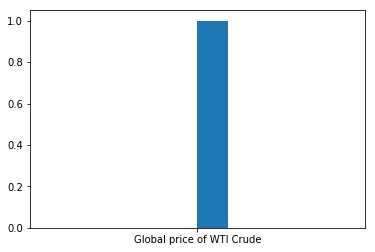

In [50]:
plt.hist('Global price of WTI Crude')